# Prevendo mortes por insuficiência cardíaca usando Machine Learning.

Problemas cardiovasculares são a principal causa de morte do mundo, é estimado que são perdidas mais de 17 milhões de vidas todo ano, sendo cerca de 31% das mortes mundias.

Insuficiência cardíaca é quando o coração não consegue bombear sangue suficiente para suprir todas as funcões do corpo.

Diversos fatores podem levar a uma morte por insuficiência cardíaca, aqui usarei cerca de 12 atributos para tentar entender quais deles levam a isso. O estudo de onde o dataset vem avaliou 299 pacientes.

Alguns fatores podem aumetar as chances de problemas cardiovasculares, como tabaco, habitos alimentares não saúdaveis, obesidade, sedentárismo e uso excessivo de alcool. Pessoas com problemas de hipertensão e diabétes também tem altos riscos.

Um diagnóstico rápido pode salvar a vida de uma pessoa, por isso usarei machine learning para tentar prever quando alguém está tendo insuficiência cardíaca e pode ir a óbito. Claro de forma simples e com um conhecimento básico sobre o assunto.

Aqui foi onde encontrei o dataset para mais informações: [Kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

Assim com mencionado no Kaggle, o dataset foi retirado de um estudo para prever se um paciente irá sobreviver a um problema de insuficiência cardíaca usando machine learning, eu irei usar esse estudo como fonte para conhecimentos técnicos da área de saúde.

Estudo:
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). ([link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)) 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.metrics import classification_report, confusion_matrix

- **age**: Idade;
- **anaemia**: Anemia, nível de globos vermelhos no sangue;
- **creatine_phosphokinase**: Nível de Creatinofosfoquinase (proteína presente em vários tecidos e celulas) (mcg/L);
- **diabetes**: Se o paciente tem diabetes ou não, 0 para não e 1 para sim;
- **ejection_fraction**: Porcentagem de sangue está saindo do coração a cada contração;
- **high_blood_pressure**: Se o paciente tem hipertensão, 0 para não e 1 para sim;
- **platelets**: Plaquetas no sangue (kiloplatelets/mL);
- **serum_creatine**: Nível de creatinina no sangue (mg/dL);
- **serum_sodium**: Nível de sódio no sangue (mEq/L);
- **sex**: 0 para feminino e 1 para masculino;
- **smoking**: Se o paciente fuma, 0 para não e 1 para sim;
- **time**: Quantidade de dias que o paciente foi acompanhado;
- **DEATH_EVENT**: Se o paciente morreu durante o acompanhamento, 0 para não e 1 para sim;

In [2]:
heart_failure = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Nenhum dado faltante e todos os atributos estão no tipo certo.

In [3]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Algumas observações:
- Idade mínima dos pacientes é de 40 anos, idade máxima é de 95 e a idade média é de 60;
- 

In [4]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


São 194 pacientes masculinos, e 105 femininos.

In [5]:
heart_failure['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

203 desses pacientes não morreram durante a observação, 96 deles morreram.

In [6]:
heart_failure['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

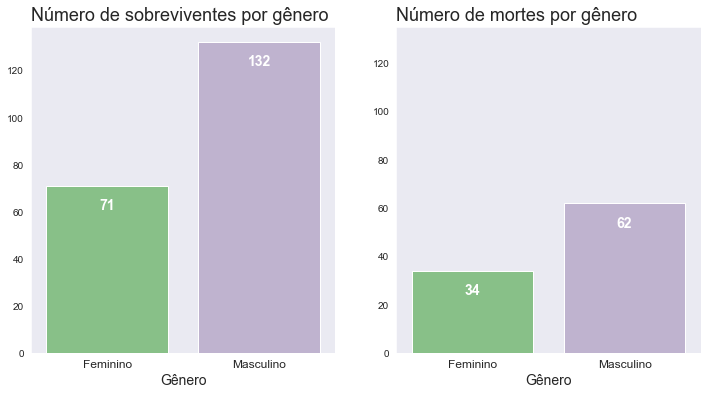

In [7]:
sns.set_palette('Accent')
sns.set_style('dark')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Número de sobreviventes por gênero', fontsize=18, loc='left')
ax = sns.countplot(heart_failure['sex'][heart_failure['DEATH_EVENT'] == 0])
ax.set_xlabel('Gênero', fontsize=14)
ax.set_ylabel('')
ax.set_xticklabels(['Feminino', 'Masculino'], fontsize=12)

labels = (heart_failure['sex'][heart_failure['DEATH_EVENT'] == 0].value_counts(ascending=True))
for i, v in enumerate(labels):
    ax.text(i, v-10, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.title('Número de mortes por gênero', fontsize=18, loc='left')
ax = sns.countplot(heart_failure['sex'][heart_failure['DEATH_EVENT'] == 1])
plt.ylim((0,135))
ax.set_xlabel('Gênero', fontsize=14)
ax.set_ylabel('')
ax.set_xticklabels(['Feminino', 'Masculino'], fontsize=12)

labels = (heart_failure['sex'][heart_failure['DEATH_EVENT'] == 1].value_counts(ascending=True))
for i, v in enumerate(labels):
    ax.text(i, v-10, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')

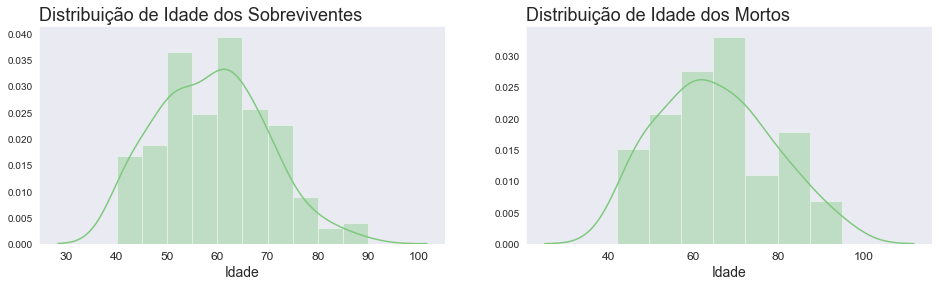

In [8]:
plt.figure(figsize=(16, 4))
ax = plt.subplot(1, 2, 1)
plt.title('Distribuição de Idade dos Sobreviventes', fontsize=18, loc='left')
sns.distplot(heart_failure['age'][heart_failure['DEATH_EVENT'] == 0])
ax.set_xlabel('Idade', fontsize=14)
ax.tick_params(axis="x", labelsize=12)

ax = plt.subplot(1, 2, 2)
sns.distplot(heart_failure['age'][heart_failure['DEATH_EVENT'] == 1])
plt.title('Distribuição de Idade dos Mortos', fontsize=18, loc='left')
ax.set_xlabel('Idade', fontsize=14)
ax.tick_params(axis="x", labelsize=12)

ax=ax

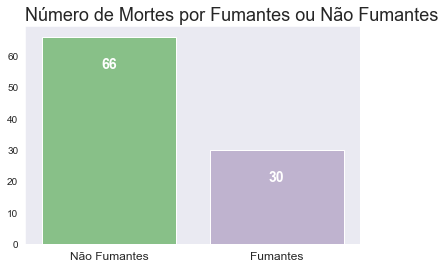

In [9]:
plt.title('Número de Mortes por Fumantes ou Não Fumantes', fontsize=18, loc='left')
ax = sns.countplot(heart_failure['smoking'][heart_failure['DEATH_EVENT'] == 1])
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_xticklabels(['Não Fumantes', 'Fumantes'], fontsize=12)


labels = (heart_failure['smoking'][heart_failure['DEATH_EVENT'] == 1].value_counts())
for i, v in enumerate(labels):
    ax.text(i, v-10, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')

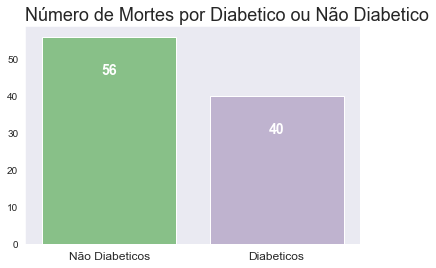

In [10]:
plt.title('Número de Mortes por Diabetico ou Não Diabetico', fontsize=18, loc='left')
ax = sns.countplot(heart_failure['diabetes'][heart_failure['DEATH_EVENT'] == 1])
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_xticklabels(['Não Diabeticos', 'Diabeticos'], fontsize=12)

labels = (heart_failure['diabetes'][heart_failure['DEATH_EVENT'] == 1].value_counts(ascending=False))
for i, v in enumerate(labels):
    ax.text(i, v-10, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')

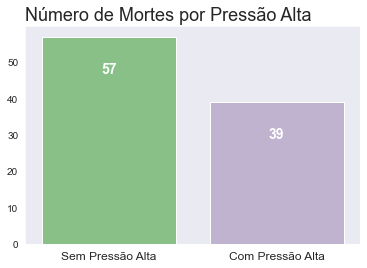

In [11]:
plt.title('Número de Mortes por Pressão Alta', fontsize=18, loc='left')
ax = sns.countplot(heart_failure['high_blood_pressure'][heart_failure['DEATH_EVENT'] == 1])
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_xticklabels(['Sem Pressão Alta', 'Com Pressão Alta'], fontsize=12)

labels = (heart_failure['high_blood_pressure'][heart_failure['DEATH_EVENT'] == 1].value_counts(ascending=False))
for i, v in enumerate(labels):
    ax.text(i, v-10, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')

Quando se tem um dano muscular o corpo libera creatinofosfoquinase (CPK) no sangue, altos níves podem significar insuficiência cárdiaca, o nível normal segundo alguns sites que pesquisei pode ser entre 10 e 120 micro-gramas por litro (mcg/L).

Já o sódio é um mineral que ajuda a corrigir funções dos muscúlos e nervos, um nível muito abaixo do normal pode significar insuficiência cárdiaca também, os n´veis normais segundo alguns sites que pesquisei é de 135 a 145 miliequivalentes por litro (mEq/L).

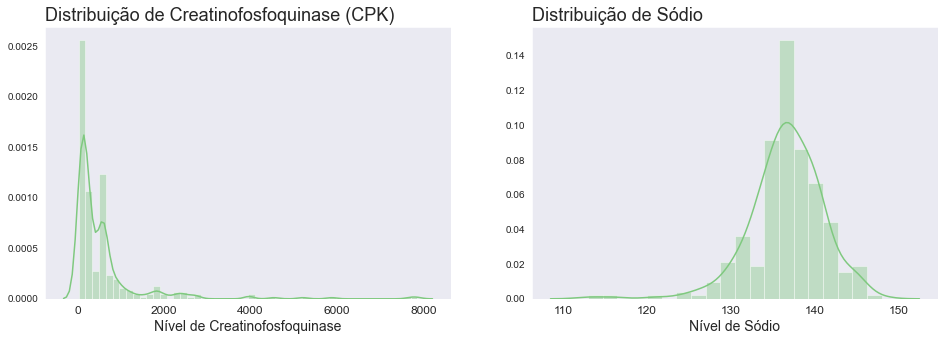

In [12]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
ax = sns.distplot(heart_failure['creatinine_phosphokinase'])
plt.title('Distribuição de Creatinofosfoquinase (CPK)', fontsize=18, loc='left')
ax.set_xlabel('Nível de Creatinofosfoquinase', fontsize=14)
ax.tick_params(axis="x", labelsize=12)

plt.subplot(1, 2, 2)
ax = sns.distplot(heart_failure['serum_sodium'])
plt.title('Distribuição de Sódio', fontsize=18, loc='left')
ax.set_xlabel('Nível de Sódio', fontsize=14)
ax.tick_params(axis="x", labelsize=12)

Preparando os dados de treino e teste.

In [13]:
X = heart_failure.drop(['time', 'DEATH_EVENT'], axis=1)
y = heart_failure['DEATH_EVENT']

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Treinando modelos para a previsão.

## XGBoost

In [14]:
params = {
    'eta': [0.3, 0.01],
    'min_child_weight': [1, 3, 7],
    'max_depth': [3, 6, 10],
    'n_estimators': [100, 200, 500]
}

grid_xgboost = GridSearchCV(XGBClassifier(), params, scoring='accuracy', cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=1)
grid_xgboost.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 247 out of 270 | elapsed:    6.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    6.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     mis...ts=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                   

In [15]:
grid_xgboost.best_score_

0.7279255319148936

In [16]:
xgboost = grid_xgboost.best_estimator_
y_pred = xgboost.predict(X_test)

Segundo o "classification report" o XGBoost chega a uma precisão de 81% dos casos em que não ocorre morte enquanto apenas 61% dos casos que ocorrem, ou seja apenas 61% dos casos que são colocados como morte realmente são, o recall diz que dos casos quantos deles são classificados no caso certo, no caso apenas 58% dos casos de morte foram classificados corretamente, com isso chegando a uma acurácia de 75%.

In [17]:
classificacao = classification_report(y_test, y_pred)
print(classificacao)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.61      0.58      0.59        19

    accuracy                           0.75        60
   macro avg       0.71      0.70      0.71        60
weighted avg       0.75      0.75      0.75        60



Na matriz de confusão é possivel enxergar melhor a precisão do modelo.

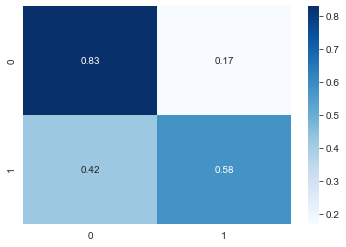

In [18]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')

## KNN

In [19]:
params = {
    'n_neighbors': range(1, 10),
    'leaf_size': range(1, 50),
    'p': [1, 2]
}

grid_knn = GridSearchCV(KNeighborsClassifier(n_neighbors=2), params, scoring='accuracy', cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=1)
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 882 candidates, totalling 4410 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4410 out of 4410 | elapsed:    4.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_neighbors=2), n_jobs=-1,
             param_grid={'leaf_size': range(1, 50), 'n_neighbors': range(1, 10),
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [20]:
grid_knn.best_score_

0.6402482269503545

In [21]:
knn = grid_knn.best_estimator_
y_pred = knn.predict(X_test)

O modelo de KNN se mostrou muito pior, praticamente ele colocou como se todos tivessem sobrevividos, apenas 11% dos casos de morte foram colocados como morte.

In [22]:
classificacao = classification_report(y_test, y_pred)
print(classificacao)

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        41
           1       0.40      0.11      0.17        19

    accuracy                           0.67        60
   macro avg       0.55      0.52      0.48        60
weighted avg       0.60      0.67      0.59        60



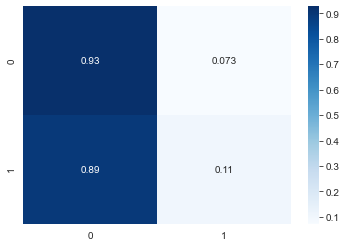

In [23]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')

## CatBoost

In [24]:
params = {
    'iterations': [100],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': range(1, 16)
}

grid_catboost = GridSearchCV(CatBoostClassifier(od_type='Iter'), params, scoring='accuracy', cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=1)
grid_catboost.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  3.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E9287EBDD8>,
             n_jobs=-1,
             param_grid={'depth': range(1, 16), 'iterations': [100],
                         'learning_rate': [0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [25]:
grid_catboost.best_score_

0.7278368794326242

In [26]:
model_catboost = grid_catboost.best_estimator_
y_pred = model_catboost.predict(X_test)

O CatBoost foi o que se saiu melhor com uma precisão das mortes de 83% ou seja de todos os casos classificados como morte 83% deles estavam certos. Apesar que apenas 53% dos casos que são morte foram classificados certo, como diz o recall.Além disso com uma acurácia de 82%.

Ele pode prever bem os casos em que as pessoas sobrevivem com uma precisão de 81% e um recall de 95%.

In [27]:
classificacao = classification_report(y_test, y_pred)
print(classificacao)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.83      0.53      0.65        19

    accuracy                           0.82        60
   macro avg       0.82      0.74      0.76        60
weighted avg       0.82      0.82      0.80        60



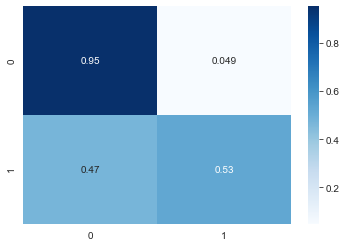

In [28]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues')

O CatBoost será o modelo que irei escolher então irei treina-lo com todos os dados e assim irei salva-lo para um possivel uso em produção.

In [29]:
modelo = model_catboost.fit(X, y, verbose=0)

In [30]:
import pickle

In [31]:
output = open('modelo_catboost', 'wb')
pickle.dump(modelo, output)
output.close()